# Graph Theory: Simple and Shortest Paths - Lab

## Introduction

In this lab you'll take the concepts from the previous lesson and code them from scratch yourself! You'll start by unpacking Dijkstra's algorithm and write an implementation to find the shortest path between two nodes. From there, you'll expand on the initial function in order to return the path itself and create a visualization to better understand the underlying process.

## Objectives
You will be able to:
* Understand and explain simple paths and shortest paths
* Calculate simple and shortest paths for undirected, directed and weighted graphs
* Explain Dijkstra Algorithm and calculate the shortest path using this algorithm in networkx
* Code Dijkstra's Algorithm from scratch
* Customize network visualizations

## Importing Packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Regenerating the [Small World] Network

To start, here's the network from the previous lesson:

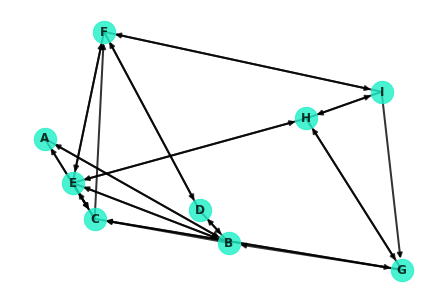

In [2]:
G = nx.navigable_small_world_graph(3, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ["A", "B", "C", "D", "E", "F", "G", "H", "I"])))
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8)

## Dijkstra's Algorithm

As a helpful reference, here's the description of Dijkstra's Algorithm from the previous lesson:


Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudocode outline for the algorithm:

1. Mark all nodes as unvisited
2. Set the distance of the starting node as 0, and $\infty$ for all other nodes
3. Set the starting node as the current node
4. Visit each of the neighbors of the current node
    1. For each neighbor, calculate the distance to that node traveling through the current node
    2. If this distance is less then the current distance recorded for that node, update the record accordingly
5. Mark the current node as "visited"
6. Of the unvisited nodes, set the one with the smallest distance to the current node
7. Repeat steps 4 through 6 until one of the following:
    1. The algorithm terminates when the destination node is the current node
    2. Alternatively, if the the smallest distance of the unvisited nodes is $\infty$, then no path exists to the destination node. 

> Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned.

## Coding Dijkstra's Algorithm Part 1

Implement a function to perform Dijkstra's algorithm. The function should take in three parameters: the graph G, the starting node u, and the destination node v. From there, return the minimum distance between nodes u and v. In the case that there is no path connecting u and v, printout an appropriate notification and return a null value.

In [3]:
for edge in G['C']:
    print(edge)

A
E
G
F


In [4]:
G['B']

AtlasView({'A': {}, 'D': {}, 'E': {}, 'C': {}})

In [5]:
G.in_edges('G'), G.out_edges('G')

(InEdgeDataView([('C', 'G'), ('H', 'G'), ('I', 'G')]),
 OutEdgeDataView([('G', 'C'), ('G', 'H'), ('G', 'B')]))

In [6]:
test_dict = dict.fromkeys(list(G.nodes), False)

In [7]:
test_dict['G'] = True

In [8]:
test_dict

{'A': False,
 'B': False,
 'C': False,
 'D': False,
 'E': False,
 'F': False,
 'G': True,
 'H': False,
 'I': False}

In [9]:
{key:value for key, value in test_dict.items() if not value}

{'A': False,
 'B': False,
 'C': False,
 'D': False,
 'E': False,
 'F': False,
 'H': False,
 'I': False}

In [10]:
test_dist = dict.fromkeys(list(G.nodes), 0)

In [11]:
test_dist

{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0}

In [12]:
for edge in G['G']:
    test_dist[edge] = test_dist['G']+1

In [13]:
sorted(list(test_dist.items()), key = lambda x: x[1])

[('A', 0),
 ('D', 0),
 ('E', 0),
 ('F', 0),
 ('G', 0),
 ('I', 0),
 ('B', 1),
 ('C', 1),
 ('H', 1)]

In [14]:
False in test_dict.values()

True

In [15]:
float('inf') ==  10000

False

In [16]:
def dijkstra(G, u, v):
    #Your code here
    """G is the graph in question.
    u is the starting node
    v is the destination node
    """
    if u==v:
        return 0
    else:
        visit_dict = dict.fromkeys(list(G.nodes), False)
        visit_dict[u] = True

        dist_dict = dict.fromkeys(list(G.nodes), float('inf'))
        dist_dict[u] = 0

        #neighbors = list(set([edge[0] for edge in list(G.in_edges(u))] + 
        #                     [edge[1] for edge in list(G.out_edges(u))]))

        #set distance for neighbors of starting node
        for edge in G[u]:
            dist_dict[edge] = dist_dict[u] + 1

        #subset unvisted nodes
        unvisited_dict = {key:value for key, value in visit_dict.items() if not value}
        unvisited_dist = {key:dist_dict[key] for key in unvisited_dict.keys()}
        unvisted_sorted = sorted(list(unvisited_dist.items()), key = lambda x: x[1])

        while unvisted_sorted[0][1] < float('inf'):
            print(unvisted_sorted) 
            current = unvisted_sorted[0][0]
            visit_dict[current] = True
            
            if current == v:
                return dist_dict[v]
            else:
                #neighbors = list(set([edge[0] for edge in list(G.in_edges(current))] + 
                #                     [edge[1] for edge in list(G.out_edges(current))]))

                for edge in G[current]:
                    if not visit_dict[edge] and dist_dict[edge]==float('inf'):
                        dist_dict[edge] = dist_dict[current] + 1

                unvisited_dict = {key:value for key, value in visit_dict.items() if not value}
                unvisited_dist = {key:dist_dict[key] for key in unvisited_dict.keys()}
                unvisted_sorted = sorted(list(unvisited_dist.items()), key = lambda x: x[1])    


        print('no path exist between selected nodes')
        return None

Test out your function on a couple of node pairs, and compare the output to that of NetworkX's built in implementation to verify your results.

In [17]:
#Test your function here
dijkstra(G, 'G', 'B')

[('B', 1), ('C', 1), ('H', 1), ('A', inf), ('D', inf), ('E', inf), ('F', inf), ('I', inf)]


1

In [18]:
#Compare to NetworkX's built in method
nx.dijkstra_path_length(G, 'G', 'B')

1

## Coding Dijkstra's Algorithm Part 2

Now, update your algorithm to not only return the minimum distance between the two points, but a list of nodes outlining the directions for the shortest path from the starting node to the destination node. The direction list of nodes should start with the starting node, and end with the destination node, with intermediate step nodes in between. For example, just like the built in method from NetworkX, 

```python
nx.dijkstra_path(G, "I", "A")
```
should return 

```python
['I', 'G', 'C', 'A']
```


In [19]:
#Your code here
def dijkstra_path(G, u, v, return_path_directions=True):
    #Your code here
    """G is the graph in question.
    u is the starting node
    v is the destination node
    """
    if u==v:
        return [u]
    else:
        visit_dict = dict.fromkeys(list(G.nodes), False)
        visit_dict[u] = True

        path_dict = dict.fromkeys(list(G.nodes), [])
        path_dict[u] = [u]
        dist_dict = dict.fromkeys(list(G.nodes), float('inf'))
        dist_dict[u] = 0

        #neighbors = list(set([edge[0] for edge in list(G.in_edges(u))] + 
        #                     [edge[1] for edge in list(G.out_edges(u))]))

        #set distance and connection for neighbors of starting node
        for edge in G[u]:
            dist_dict[edge] = dist_dict[u] + 1
            path_dict[edge] = [u, edge]

        #subset unvisted nodes
        unvisited_dict = {key:value for key, value in visit_dict.items() if not value}
        unvisited_dist = {key:dist_dict[key] for key in unvisited_dict.keys()}
        unvisited_sorted = sorted(list(unvisited_dist.items()), key = lambda x: x[1])

        while unvisited_sorted[0][1] < float('inf'):
            
            current = unvisited_sorted[0][0]
            visit_dict[current] = True
            
            #print(current)
            #print(G[current])
            #print(path_dict)
                
            if unvisited_sorted[0][0] == v:
                return path_dict[v]
            else:
                #neighbors = list(set([edge[0] for edge in list(G.in_edges(current))] + 
                #                     [edge[1] for edge in list(G.out_edges(current))]))

                for edge in G[current]:
                    if not visit_dict[edge] and dist_dict[edge]==float('inf'):
                        dist_dict[edge] = dist_dict[current] + 1
                        path_dict[edge] = path_dict[current]+[edge]

                unvisited_dict = {key:value for key, value in visit_dict.items() if not value}
                unvisited_dist = {key:dist_dict[key] for key in unvisited_dict.keys()}
                unvisited_sorted = sorted(list(unvisited_dist.items()), key = lambda x: x[1])    


        print('no path exist between selected nodes')
        return None

Now check your updated function against the built in methods from NetworkX again.

In [20]:
#Your code here
nx.dijkstra_path(G, 'I', 'A')

['I', 'G', 'C', 'A']

In [21]:
dijkstra_path(G, 'I', 'A')

['I', 'G', 'B', 'A']

## Level-Up: Creating a Visual

Modify your function in order to produce successive plots to visualize the process of Dijkstra's algorithm. Plot the edges connecting the starting node to "visited" nodes using one color (ideally #00b3e6). Then, plot the current edge connecting the current node to the neighbor being explored with another color (ideally #ffd43d). Create a subplot of these graphs to show the process of the algorithm.

Putting these plots together, you can also create a fun interactive visual of Dijkstra's algorithm!
Here's what the search for the shortest path between `F` and `G` looks like:

<img src="images/Dijkstra_Visualized.gif">

Or broken apart, here are the individual steps shown as subplots:

<img src="images/dijkstra_subplots.png">

In [22]:
#Your code here
def dijkstra(G, u, v, return_path_directions=True, show_plots=True):
    #Your code here
    """G is the graph in question.
    u is the starting node
    v is the destination node
    
    Returns path, distance
    """

In [23]:
dijkstra(G, "F", "G")

## Summary 


Well done! In this lab, you deconstructed Dijkstra's algorithm and coded your own implementation! Finding the shortest path between nodes is a foundational concept in network theory and will help inform future concepts such as centrality and betweenness in order to further analyze the structures of graphs.